#### Linear Regression
- X-y split (y is the target variable, in this case, "total claim amount")
- Train-test split.
- Standardize the data (after the data split!).
- Apply linear regression.
- Model Interpretation.

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/repicao/IH_AB_DA_FT_MAY_2023/master/Class_Materials/Case_Studies/Customer_Analysis_Case_Study/Data/Data_Marketing_Customer_Analysis_Round3.csv')
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [3]:
numerical = df.select_dtypes(include=[np.number])
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [5]:
numerical = numerical.dropna()

In [16]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


#### X-y split

In [21]:
X_columns = ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']

In [23]:
X = np.array(numerical[X_columns])
y = numerical['total_claim_amount']

In [36]:
X.hist()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

#### Train-Test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)

#### Model Generation

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer

In [90]:
scaler = PowerTransformer()
scaler_fit= scaler.fit(X_train)

In [91]:
scaler_transform_X_train= scaler.transform(X_train)
scaler_transform_X_train

array([[ 1.69337582, -1.24953202, -1.16372932, ..., -0.5250912 ,
        -0.5042308 , -0.06898363],
       [ 0.54398465, -0.36113411,  0.79418089, ...,  1.61214224,
         2.02653765,  1.31370663],
       [-0.67977768,  0.0284999 ,  0.65674331, ..., -0.60243066,
        -0.5042308 , -1.14867911],
       ...,
       [-0.55831655, -1.40055861, -1.25140585, ..., -1.54524554,
         2.04086135,  1.57257965],
       [ 1.12125479,  1.0108369 ,  0.79418089, ...,  1.38612783,
        -0.5042308 , -0.06898363],
       [ 0.26424381,  0.54852696,  0.62721605, ...,  0.28715563,
        -0.5042308 ,  1.45775979]])

In [99]:
scaler_transform_X_test

array([[ 1.69337582, -1.24953202, -1.16372932, ..., -0.5250912 ,
        -0.5042308 , -0.06898363],
       [ 0.54398465, -0.36113411,  0.79418089, ...,  1.61214224,
         2.02653765,  1.31370663],
       [-0.67977768,  0.0284999 ,  0.65674331, ..., -0.60243066,
        -0.5042308 , -1.14867911],
       ...,
       [-0.55831655, -1.40055861, -1.25140585, ..., -1.54524554,
         2.04086135,  1.57257965],
       [ 1.12125479,  1.0108369 ,  0.79418089, ...,  1.38612783,
        -0.5042308 , -0.06898363],
       [ 0.26424381,  0.54852696,  0.62721605, ...,  0.28715563,
        -0.5042308 ,  1.45775979]])

In [100]:
print(model.coef_)
print(model.intercept_)

[ -2.71614498 -36.29813171 162.08426223   2.07457984  -1.29805377
  -2.89204253   0.96297564]
432.78271547191827


In [101]:
compare = pd.DataFrame({'y_test':list(y_test), 'y_pred':list(y_pred)})
compare

,y_test,y_pred
0,120,150.441350
1,660,603.078301
2,244,379.781752
3,86,212.539010
4,1032,751.519694
...,...,...
2133,285,575.694208
2134,494,523.214427
2135,537,539.624586
2136,446,525.859241


In [103]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [104]:
mse(y_test,y_pred)

56887.588063601776

In [105]:
mae(y_test, y_pred)

166.09915795541698

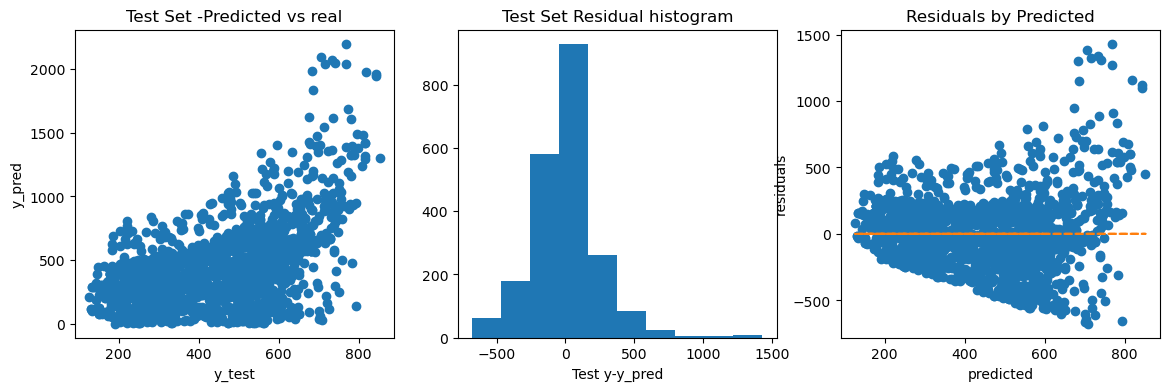

In [107]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# Does it resemble a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')